<a href="https://colab.research.google.com/github/santhosh706/Loan-Prediction/blob/main/Copy_of_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np#for data processing
import pandas as pd #for structured data and for pre-processing
import seaborn as sns # for visualization
from sklearn.model_selection import train_test_split #to train the data and   to evaluate test it
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import accuracy_score #for accuracy ..
from sklearn.metrics import r2_score

Data Processing

In [ ]:

#collection and processing of data
pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data_set=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [ ]:
data_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data_set.shape

(614, 13)

In [ ]:
#statistical measures..
data_set.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#finding the missing values in data set
data_set.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Drop the missing values
data_set=data_set.dropna()

In [ ]:
'''data_set['Gender'].fillna(data_set['Gender'].mode()[0], inplace=True)
data_set['Married'].fillna(data_set['Married'].mode()[0], inplace=True)
data_set['Dependents'].fillna(data_set['Dependents'].mode()[0], inplace=True)
data_set['Self_Employed'].fillna(data_set['Self_Employed'].mode()[0], inplace=True)
data_set['Credit_History'].fillna(data_set['Credit_History'].mode()[0], inplace=True)
data_set['Loan_Amount_Term'].fillna(data_set['Loan_Amount_Term'].mode()[0], inplace=True)
data_set['LoanAmount'].fillna(data_set['LoanAmount'].median(), inplace=True)'''

"data_set['Gender'].fillna(data_set['Gender'].mode()[0], inplace=True)\ndata_set['Married'].fillna(data_set['Married'].mode()[0], inplace=True)\ndata_set['Dependents'].fillna(data_set['Dependents'].mode()[0], inplace=True)\ndata_set['Self_Employed'].fillna(data_set['Self_Employed'].mode()[0], inplace=True)\ndata_set['Credit_History'].fillna(data_set['Credit_History'].mode()[0], inplace=True)\ndata_set['Loan_Amount_Term'].fillna(data_set['Loan_Amount_Term'].mode()[0], inplace=True)\ndata_set['LoanAmount'].fillna(data_set['LoanAmount'].median(), inplace=True)"

In [ ]:
data_set.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
#Label Encoding..
data_set.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [ ]:
data_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
#Dependent colum values
data_set['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
# replacing the value of 3+ to 4
data_set = data_set.replace(to_replace='3+', value=4)


In [ ]:
# dependent values
data_set['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization


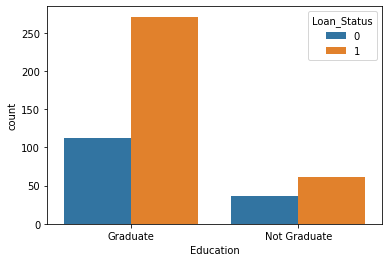

In [ ]:
sns.countplot(x='Education',hue='Loan_Status',data=data_set)

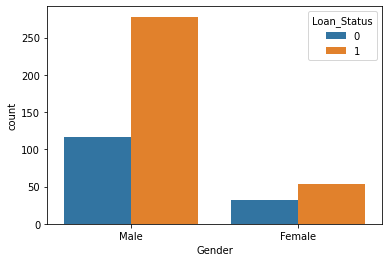

In [ ]:
sns.countplot(x='Gender',hue='Loan_Status',data=data_set)

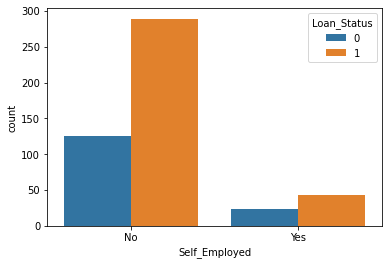

In [ ]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data_set)

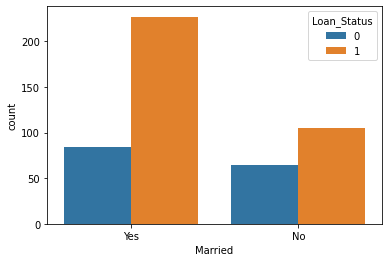

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=data_set)

In [ ]:
# convert text columns to numerical 
data_set.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
data_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
#Seperating data and label
X = data_set.drop(columns=['Loan_ID','Loan_Status'])
Y = data_set['Loan_Status']
print(X)
print(Y)

     Gender  Married  ... Credit_History  Property_Area
1         1        1  ...            1.0              0
2         1        1  ...            1.0              2
3         1        1  ...            1.0              2
4         1        0  ...            1.0              2
5         1        1  ...            1.0              2
..      ...      ...  ...            ...            ...
609       0        0  ...            1.0              0
610       1        1  ...            1.0              0
611       1        1  ...            1.0              2
612       1        1  ...            1.0              2
613       0        0  ...            0.0              1

[480 rows x 11 columns]
1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


Training and Testing

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Using Support Vector Machine Model for Trainig

**SVM**

In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)


SVC(kernel='linear')

In [ ]:
X_test_prediction = classifier.predict(X_test)

In [ ]:
#Accuracy
test_data= accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test : ', test_data)

Accuracy on test :  0.8333333333333334


**Linear Regression**

In [ ]:
#Training
reg = LinearRegression()
reg.fit(X_train,Y_train)

#Predicting
Y_pred = reg.predict(X_test)

#Accuracy Score
score = r2_score(Y_test,Y_pred)
print(score)

0.323887668687176


### **Logistic Regressioin**

In [ ]:
#Training
model = LogisticRegression()
model.fit(X_train, Y_train)

#Predicting
pred_Y = model.predict(X_test)

#Accuracy Score
acc_score = accuracy_score(Y_test,pred_Y)
print(acc_score)

0.8333333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
